### Import Statements

In [60]:
#data loading 
import yfinance as yf

# Data Preprocessing

from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# Data Modelling

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split


# model Testing/Evaluation

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import metrics

## Load the data

In [24]:
# Define the ticker symbol and the date range
ticker_symbol = 'AAPL'  #Apple inc.
start_date = '1980-01-01'
end_date = '2023-12-22'

# Fetch the data using yfinance
data = yf.download(ticker_symbol, start=start_date, end=end_date)  #: This function from yfinance fetches historical
                                                        # data for the specified ticker symbol within the provided date range.
data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-15,197.529999,198.399994,197.000000,197.570007,197.570007,128256700
2023-12-18,196.089996,196.630005,194.389999,195.889999,195.889999,55751900
2023-12-19,196.160004,196.949997,195.889999,196.940002,196.940002,40714100
2023-12-20,196.899994,197.679993,194.830002,194.830002,194.830002,52242800
2023-12-21,196.100006,197.080002,193.500000,194.679993,194.679993,46482500


__Exploratory Data Analysis__

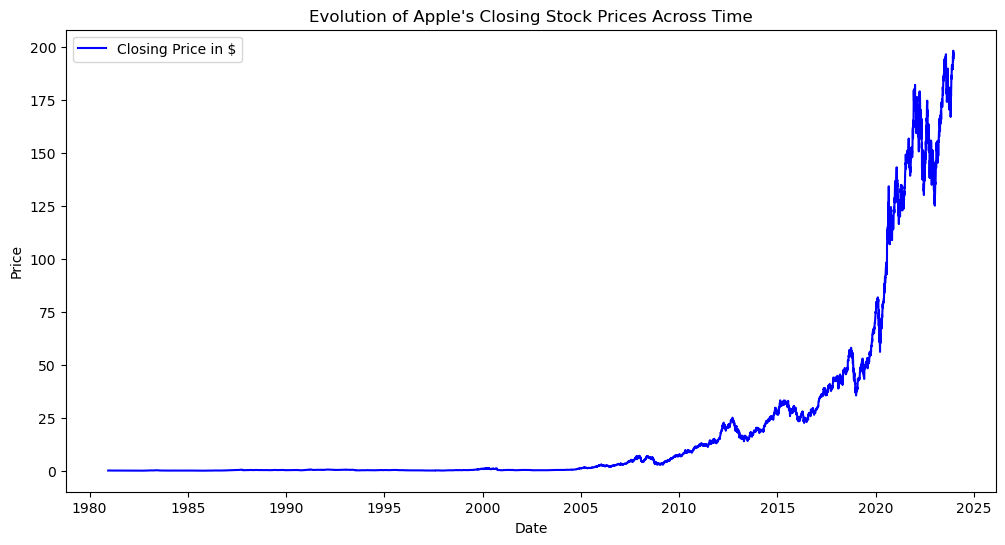

In [63]:
# Plotting the closing price throught out the history of the company
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price in $', color='blue')
plt.title("Evolution of Apple's Closing Stock Prices Across Time")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### In 2007 the first iphone was launched, and the stock price took off ever since

In [27]:
# lets look at the stock returns for 2023

[*********************100%%**********************]  1 of 1 completed


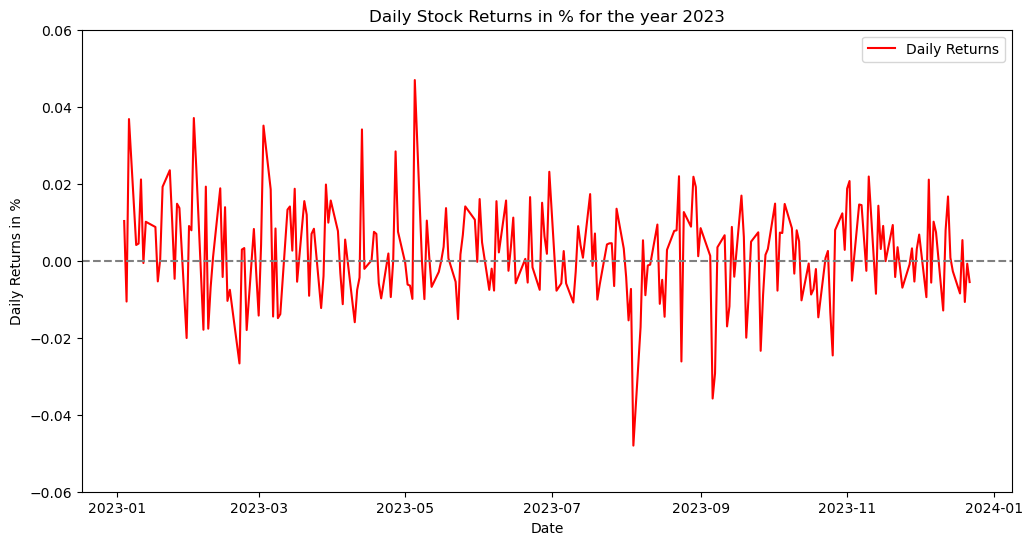

In [28]:
# stock returns for year 2023
ticker_symbol = 'AAPL'  # Samsung Electronics
start_date = '2023-01-01'
end_date = '2023-12-31'

# Fetch the data using yfinance
data_2023 = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate daily returns for 2023
data_2023['Daily_Return'] = data_2023['Close'].pct_change()

# Plotting the daily returns
plt.figure(figsize=(12, 6))
plt.plot(data_2023['Daily_Return'], label='Daily Returns', color='red')
plt.title('Daily Stock Returns in % for the year 2023')
plt.xlabel('Date')
plt.ylabel('Daily Returns in %')
plt.axhline(y=0, color='gray', linestyle='--')  # Adding a horizontal line at y=0 for reference

plt.ylim(-0.06, 0.06)  # Setting y-axis limits from -5% to +5%
plt.legend()
plt.show()

In [29]:
# from the above chart you can see how traders would have made profits/losses

__My strategy for predicting future stock prices entails training the model using historical stock data from the company's inception until December 31, 2022. Afterward, I'll assess its performance by applying it to the data specifically from the year 2023__

## Data Preprocessing

In [31]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_train_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [32]:
scaled_train_data

array([[4.00083990e-04],
       [3.66276240e-04],
       [3.21194149e-04],
       ...,
       [9.94092735e-01],
       [9.83439443e-01],
       [9.82682054e-01]])

## Modelling

In [30]:
# Function to create sequences
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i : i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

sequence_length = 100

# Creating sequences for all data

x, y = create_sequences(scaled_train_data, sequence_length)

__Split the data into train and test__

In [62]:
# Split the indices for train and test sets ,assuming data upto 2022 for train and data from year 2023 for test
split_index = int(len(x) * 0.97721) 
# When multiplying the input's (x) length by the decimal value 0.97721 and converting the result to an integer, 
# gives us the last index of the input related to the year 2022. This index is utilized for data partitioning purposes below

# Split the sequences into train and test sets
x_train, y_train = x[:split_index], y[:split_index]
x_test, y_test = x[split_index:], y[split_index:]

# Get the corresponding dates for X_train
train_dates = data.index[100:split_index + 100]  # Assuming sequence length is 100

train_dates

DatetimeIndex(['1981-05-07', '1981-05-08', '1981-05-11', '1981-05-12',
               '1981-05-13', '1981-05-14', '1981-05-15', '1981-05-18',
               '1981-05-19', '1981-05-20',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=10503, freq=None)

#### Define and Train the LSTM Model 

In [36]:
# # Define callbacks

# checkpoint = ModelCheckpoint('best_model_2.h5', monitor='val_root_mean_squared_error', save_best_only=True, mode='min', verbose=1)
# early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)


# # Building the stacked LSTM model

# model = Sequential()
# model.add(LSTM(100, return_sequences=True, input_shape=(sequence_length, 1)))                                                                                                                                                     
# model.add(LSTM(100, return_sequences=True))                                                                                                        
# model.add(LSTM(100))                                                           
# model.add(Dense(1))   


# Compile the model with appropriate metrics

# model.compile(loss='mean_squared_error', optimizer='adam', metrics=[metrics.RootMeanSquaredError(),metrics.MeanAbsoluteError()])


# # Training the model with callbacks

# history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), callbacks=[checkpoint, early_stop])


Epoch 1/100

165/165 [==============================] - ETA: 0s - loss: 8.3068e-04 - root_mean_squared_error: 0.0288 - mean_absolute_error: 0.0111
Epoch 1: val_root_mean_squared_error improved from inf to 0.04357, saving model to best_model_2.h5
165/165 [==============================] - 80s 416ms/step - loss: 8.3068e-04 - root_mean_squared_error: 0.0288 - mean_absolute_error: 0.0111 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0436 - val_mean_absolute_error: 0.0382
Epoch 2/100


C:\Users\arnav\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


165/165 [==============================] - ETA: 0s - loss: 1.4192e-04 - root_mean_squared_error: 0.0119 - mean_absolute_error: 0.0054
Epoch 2: val_root_mean_squared_error did not improve from 0.04357
165/165 [==============================] - 66s 401ms/step - loss: 1.4192e-04 - root_mean_squared_error: 0.0119 - mean_absolute_error: 0.0054 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0850 - val_mean_absolute_error: 0.0802
Epoch 3/100
165/165 [==============================] - ETA: 0s - loss: 1.3928e-04 - root_mean_squared_error: 0.0118 - mean_absolute_error: 0.0056
Epoch 3: val_root_mean_squared_error improved from 0.04357 to 0.02840, saving model to best_model_2.h5
165/165 [==============================] - 66s 403ms/step - loss: 1.3928e-04 - root_mean_squared_error: 0.0118 - mean_absolute_error: 0.0056 - val_loss: 8.0659e-04 - val_root_mean_squared_error: 0.0284 - val_mean_absolute_error: 0.0244
Epoch 4/100
165/165 [==============================] - ETA: 0s - loss: 1.6119e-04 -

165/165 [==============================] - ETA: 0s - loss: 2.9719e-05 - root_mean_squared_error: 0.0055 - mean_absolute_error: 0.0029
Epoch 20: val_root_mean_squared_error did not improve from 0.01895
165/165 [==============================] - 67s 405ms/step - loss: 2.9719e-05 - root_mean_squared_error: 0.0055 - mean_absolute_error: 0.0029 - val_loss: 6.8317e-04 - val_root_mean_squared_error: 0.0261 - val_mean_absolute_error: 0.0237
Epoch 21/100
165/165 [==============================] - ETA: 0s - loss: 4.0962e-05 - root_mean_squared_error: 0.0064 - mean_absolute_error: 0.0034
Epoch 21: val_root_mean_squared_error improved from 0.01895 to 0.01513, saving model to best_model_2.h5
165/165 [==============================] - 68s 413ms/step - loss: 4.0962e-05 - root_mean_squared_error: 0.0064 - mean_absolute_error: 0.0034 - val_loss: 2.2895e-04 - val_root_mean_squared_error: 0.0151 - val_mean_absolute_error: 0.0125
Epoch 22/100
165/165 [==============================] - ETA: 0s - loss: 2.68

Epoch 38/100
165/165 [==============================] - ETA: 0s - loss: 3.4461e-05 - root_mean_squared_error: 0.0059 - mean_absolute_error: 0.0032
Epoch 38: val_root_mean_squared_error did not improve from 0.01119
165/165 [==============================] - 68s 412ms/step - loss: 3.4461e-05 - root_mean_squared_error: 0.0059 - mean_absolute_error: 0.0032 - val_loss: 3.0379e-04 - val_root_mean_squared_error: 0.0174 - val_mean_absolute_error: 0.0148
Epoch 39/100
165/165 [==============================] - ETA: 0s - loss: 3.8560e-05 - root_mean_squared_error: 0.0062 - mean_absolute_error: 0.0036
Epoch 39: val_root_mean_squared_error did not improve from 0.01119
165/165 [==============================] - 67s 405ms/step - loss: 3.8560e-05 - root_mean_squared_error: 0.0062 - mean_absolute_error: 0.0036 - val_loss: 2.2927e-04 - val_root_mean_squared_error: 0.0151 - val_mean_absolute_error: 0.0124
Epoch 40/100
165/165 [==============================] - ETA: 0s - loss: 2.7714e-05 - root_mean_squar

In [ ]:
# Load the best model weights
model = load_model('best_model_2.h5')


#### Perform model predictions on stock prices for the year 2023 aka te test set

In [37]:
# Make predictions
y_pred = model.predict(x_test)  # make predictions on test set

8/8 [==============================] - 3s 90ms/step


In [38]:
## Inverse transform predictions to original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))

## Inverse transform the scaled test labels to get actual prices
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [39]:
y_pred[0:5]

array([[131.98524 ],
       [127.453705],
       [128.60518 ],
       [127.28455 ],
       [131.51086 ]], dtype=float32)

In [40]:
actual_prices[0:5]

array([[125.06999969],
       [126.36000061],
       [125.01999664],
       [129.61999512],
       [130.1499939 ]])

### Ploting predictions vs actual

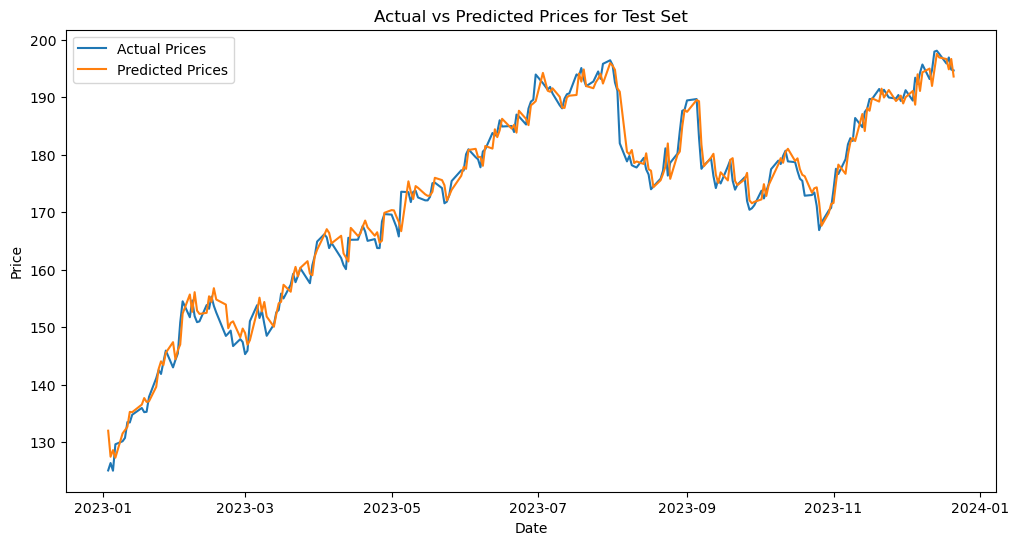

In [42]:
# Get the corresponding dates for the test set
test_dates = data.index[sequence_length + split_index:]  # Adjust sequence length if needed


# Plotting actual vs predicted prices for the test set
plt.figure(figsize=(12, 6))
plt.plot(test_dates, actual_prices, label='Actual Prices')
plt.plot(test_dates, y_pred, label='Predicted Prices')

plt.title('Actual vs Predicted Prices for Test Set')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## Calculate Metrics

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Metrics
mse = mean_squared_error(actual_prices, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_prices, y_pred)
r_squared = r2_score(actual_prices, y_pred)


print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared: {r_squared}')


Mean Squared Error (MSE): 4.90969339553623
Root Mean Squared Error (RMSE): 2.2157827952071996
Mean Absolute Error (MAE): 1.6947827708964445
R-squared: 0.9834368380456798
